In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import statsmodels.api as sm 

In [7]:
import matplotlib.pyplot as plt

In [8]:
rafi=pd.read_csv("C:/Users/SYSTEM 49/Downloads/holidays_events.csv")

In [9]:
print(rafi)
rafi.info()

           date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345          

In [10]:
rafi.shape

(350, 6)

In [11]:
rafi.describe()




,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [12]:
rafi.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
rafi["date"]=le.fit_transform(rafi["date"])
rafi["type"]=le.fit_transform(rafi["type"])
rafi["locale"]=le.fit_transform(rafi["locale"])
rafi["locale_name"]=le.fit_transform(rafi["locale_name"])
rafi["description"]=le.fit_transform(rafi["description"])
rafi["transferred"] = rafi["transferred"].astype(int)


In [16]:
rafi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   date         350 non-null    int64
 1   type         350 non-null    int64
 2   locale       350 non-null    int64
 3   locale_name  350 non-null    int64
 4   description  350 non-null    int64
 5   transferred  350 non-null    int64
dtypes: int64(6)
memory usage: 16.5 KB


In [17]:
rafi.describe()

,date,type,locale,locale_name,description,transferred
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,155.720000,2.437143,0.634286,7.794286,35.654286,0.034286
std,90.797084,1.143209,0.608414,6.157714,26.053789,0.182223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.250000,2.000000,0.000000,4.000000,15.000000,0.000000
50%,157.500000,3.000000,1.000000,4.000000,30.500000,0.000000
75%,233.000000,3.000000,1.000000,11.000000,51.000000,0.000000
max,311.000000,5.000000,2.000000,23.000000,102.000000,1.000000


In [18]:
rafi['lag_1'] = rafi['type'].shift(1)
rafi['lag_7'] = rafi['type'].shift(7)
rafi['lag_14'] = rafi['type'].shift(14)


In [19]:
rafi['roll_mean_7'] = rafi['type'].shift(1).rolling(window=7).mean()
rafi['roll_std_7'] = rafi['type'].shift(1).rolling(window=7).std()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

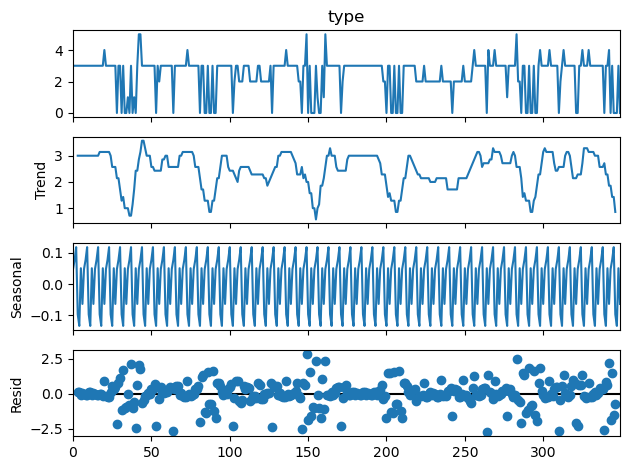

In [21]:
decomposition = seasonal_decompose(rafi['type'], model='additive', period=7)
decomposition.plot()
plt.tight_layout()
plt.show()

In [22]:
rafi = pd.read_csv('C:/Users/SYSTEM 49/Downloads/holidays_events.csv')
rafi['date'] = pd.to_datetime(rafi['date'])
rafi.set_index('date', inplace=True)
rafi.sort_index(inplace=True)

In [23]:
rafi = rafi.resample('D').size().to_frame(name='event_count')

In [24]:
rafi['lag_1'] = rafi['event_count'].shift(1)
rafi['lag_7'] = rafi['event_count'].shift(7)
rafi['roll_mean_7'] = rafi['event_count'].shift(1).rolling(window=7).mean()


In [36]:
rafi.dropna(inplace=True)

In [37]:
X = rafi[['lag_1', 'lag_7', 'roll_mean_7']]
y = rafi['event_count']

In [38]:
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
forecast_rafi = rafi.copy()

In [58]:
for i in range(7):
    last_row = forecast_rafi.iloc[-1]
    lag_1 = last_row['event_count']
    lag_7 = forecast_rafi.iloc[-7]['event_count'] if len(forecast_rafi) >= 7 else np.nan
    roll_mean_7 = forecast_rafi['event_count'].iloc[-7:].mean()


In [59]:
X_future = pd.DataFrame([[lag_1, lag_7, roll_mean_7]], columns=['lag_1', 'lag_7', 'roll_mean_7'])

In [60]:
if X_future.isnull().values.any():
        print("Not enough data to forecast further.")
        

In [62]:
forecast_rafi = rafi.copy()

In [64]:
next_pred = model.predict(X_future)[0]
next_date = forecast_rafi.index[-1] + pd.Timedelta(days=1)

In [65]:
forecast_rafi.loc[next_date] = [next_pred, lag_1, lag_7, roll_mean_7]

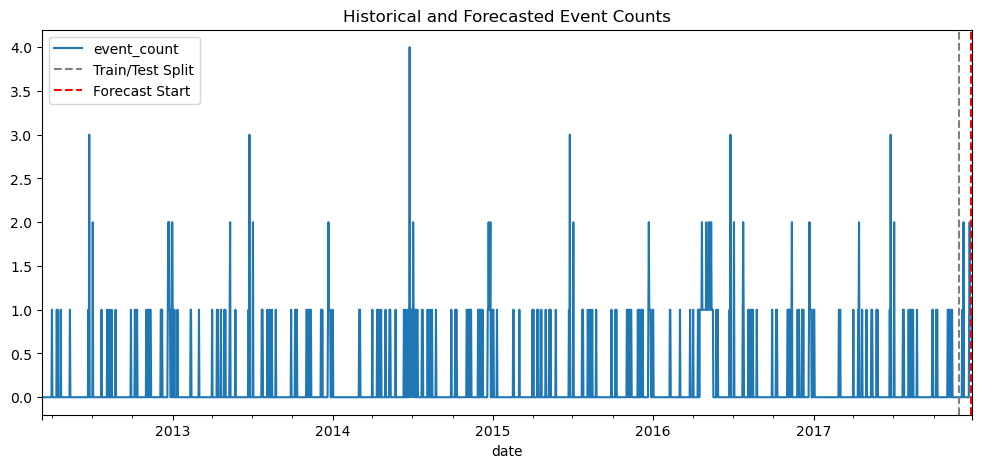

In [66]:
forecast_rafi['event_count'].plot(figsize=(12, 5), title='Historical and Forecasted Event Counts')
plt.axvline(x=X_test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.axvline(x=rafi.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.show()